# Tugas
- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
- Anda diperbolehkan melakukan eksplorasi terhadap,
 - Metode pra pengolahan
 - Pemilihan fitur
 - Arsitektur ANN
 - Fungsi Aktiviasi
- ANN diimplementasikan dengan menggunakan tensorflow.
- DIKERJAKAN SECARA BERKELOMPOK
- JELASKAN HASIL YANG ANDA DAPATKAN,
 - AKURASI
 - CONFUSION MATRIX
 - KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

In [1]:
# import
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# sklearn
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(len(X_train))
print(len(X_test))

60000
10000


In [6]:
# normalisasi
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# reshape data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [8]:
# membangun model ANN
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
# pelatihan model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2559 - accuracy: 0.9279 - val_loss: 0.1305 - val_accuracy: 0.9621
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1133 - accuracy: 0.9668 - val_loss: 0.1042 - val_accuracy: 0.9677
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0782 - accuracy: 0.9768 - val_loss: 0.0831 - val_accuracy: 0.9760
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0580 - accuracy: 0.9820 - val_loss: 0.0787 - val_accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0755 - val_accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.0782 - val_accuracy: 0.9760
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0276 - accuracy: 0.9911 - val_loss: 0.0749 - val_accur

In [10]:
# evaluasi model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0785 - accuracy: 0.9790
Test Accuracy: 0.9789999723434448


313/313 [==============================] - 1s 2ms/step


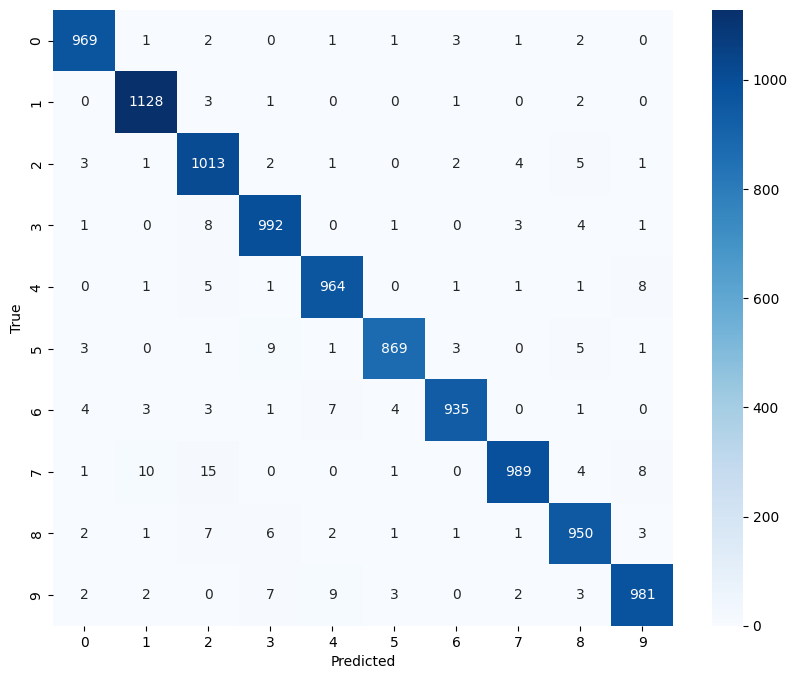

In [17]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Penjelasan
Confusion matrix digunakan untuk mengevaluasi kinerja model klasifikasi dengan membandingkan nilai prediksi model terhadap nilai sebenarnya dari dataset uji. Setiap elemen dalam confusion matrix merepresentasikan jumlah instance data pada kelas tertentu yang dikenali atau tidak dikenali dengan benar oleh model

- Baris (True Class): Merepresentasikan kelas sebenarnya dari data.
- Kolom (Predicted Class): Merepresentasikan kelas yang diprediksi oleh model.

#Interpretasi:

- Diagonal utama dari kiri atas ke kanan bawah (969, 1128, 1013, dst.) menunjukkan jumlah instance yang diklasifikasikan dengan benar.
- Elemen non-diagonal menunjukkan jumlah instance yang salah diklasifikasikan. Contohnya, pada baris 1, kolom 2 (1) menunjukkan bahwa ada 1 instance yang sebenarnya milik kelas 1 tetapi salah diklasifikasikan sebagai kelas 2.

#Beberapa Poin Penting:

- Jumlah instance yang benar diklasifikasikan pada setiap kelas dapat dilihat dari diagonal utama.
- Angka di sepanjang diagonal utama mencerminkan akurasi klasifikasi untuk setiap kelas.
- Jumlah instance yang salah diklasifikasikan dapat dilihat dari elemen di luar diagonal utama.